# Introducción al Aprendizaje Supervisado - Regresión (Parte II)
* Regresión Polinomial
* Cross Validation
* Bias-Variance Tradeoff

## 5to año - Ingeniería en Sistemas de Información

### Facultad Regional Villa María

#### Limitaciones de la Regresión Lineal

* En la práctica, son pocos los casos interesantes donde un fenómeno se comporta de manera lineal. Las limitaciones del modelo lineal saltan a simple vista: incluso en un ejemplo que crece linealmente como el presentado, se aprecia fácilmente que existe una considerable diferencia en la predicción.

* Esta diferencia se conoce como **error de sesgo** (bias error): es el error producido al utilizar un modelo muy simple para predecir aspectos complejos de la vida real. Mientras más inflexible es el modelo utilizado, como en el caso de una regresión lineal, mayor será la interpretabilidad del modelo, pero más alto será el error de sesgo.

* Cuando el error de sesgo es alto, se dice que el modelo no se está adaptando correctamente a los datos (**underfitting**).

* Para paliar estas limitaciones se debe usar un modelo más flexible.

### Regresión Polinomial

* Una simple extensión de la regresión lineal consiste en incluir polinomios de mayor grado en la regresión para mejorar la predicción.
* De esta manera, la regresión pasa a ser no lineal pero conservando la interpretabilidad de la regresión lineal, pasando a tomar la forma

$$ \hat{Y} = \hat{\beta_0} + \hat{\beta_1} X_1 + \hat{\beta_1} X_2 +...+ \hat{\beta_i} X_1^2 + \hat{\beta_j} X_2^2 + ...$$

* Es un método simple que suele dar buenas aproximaciones, pero debe tenerse especial cuidado con el _overfitting_, puesto que cuando el grado del polinomio es lo suficientemente grande, la variable de respuesta resultará cada vez más sensible a leves aumentos o disminuciones de las variables de entrada.
* A continuación, intentamos aproximar la función anterior realizando una regresión polinomial probando distintos grados en polinomios de la forma

$$ \hat{Y} = \hat{\beta_0} + \hat{\beta_1} X_1 + \hat{\beta_1} X_2 +...+ \hat{\beta_i} X_1^2 + \hat{\beta_j} X_2^2 + \hat{\beta_k} X_1 X_2 + ... $$

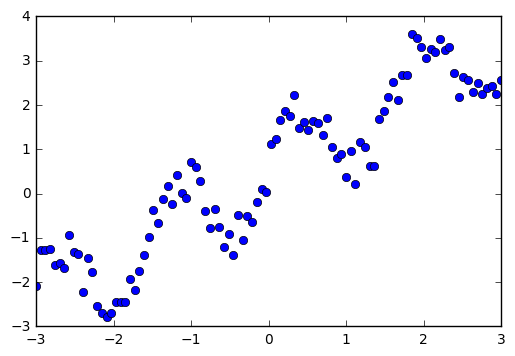

In [1]:
# X e y de la clase pasada

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
% matplotlib inline

x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42) 
y = np.sin(4 * x) + x + rng.uniform(size=len(x))
plt.plot(x, y, 'o');

X = x[:, np.newaxis]

X_train = X[0:70]
X_test = X[70:99]
y_train = y[0:70]
y_test = y[70:99]

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Empezamos nuestra predicción con un polinomio de grado 1
poly = PolynomialFeatures(degree=7)

# Los datos se adaptan al modelo y se transforman a la forma polinómica
X_train_poly = poly.fit_transform(X_train, y_train)

# Se utiliza un nuevo regresor lineal, el cual efectúa la regresión polinómica
# al adaptar los datos transformados.
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

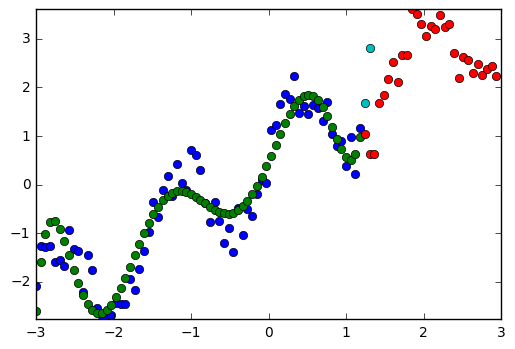

MSE entrenamiento:  0.192505732012
MSE test:  336112.369108


In [12]:
# Veamos cómo este nuevo modelo predice la salida
# Nota: en este ejemplo se muestra entrenamiento y test en un sólo gráfico
# por cuestiones de mejor visualización por la forma en la que se eligieron los subconjuntos
# No obstante, lo común es tener un gráfico donde se muestre la predicción de entrenamiento y otro
# donde se muestre la predicción de test.

# Entrenamiento
axes = plt.subplot(111) # Establecemos límites fijos para el gráfico
axes.set_xlim(X.min(), X.max())
axes.set_ylim(y.min(), y.max())

plt.plot(X_train, y_train, 'o')
plt.plot(X_train, poly_regressor.predict(X_train_poly), 'o', label='predicción de entrenamiento')
X_test_poly = poly.transform(X_test)

# Test

plt.plot(X_test, y_test, 'o')
plt.plot(X_test, poly_regressor.predict(X_test_poly), 'o', label='predicción de test')
plt.show()

print('MSE entrenamiento: ',mean_squared_error(y_train, poly_regressor.predict(X_train_poly)))
print('MSE test: ',mean_squared_error(y_test, poly_regressor.predict(X_test_poly)))

**¿Por qué ocurre esto, siendo que el modelo es mucho más flexible que la regresión lineal?**

* Problema número 1: el método empleado para seleccionar datos fue pésimo.

* Los datos fueron tomados teniendo en cuenta su índice como criterio, lo cual es un **error muy grave**.

* En este caso (al igual que en la clase pasada), se utilizó este mal método a propósito para remarcar este aspecto. No obstante, desde ahora y en adelante se utilizarán métodos mucho mejores de muestreo (dejando ya el método anterior de ser aceptable en las entregas de TP).

* El primer enfoque para mejorar el muestreo consiste en dividir los datos **aleatoriamente** en conjuntos de entrenamiento y test. Scikit-learn hace muy simple esto

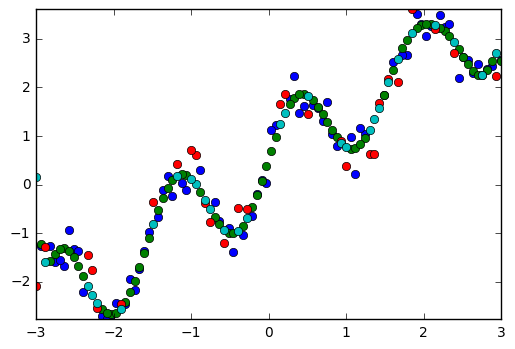

MSE entrenamiento:  0.0593668021026
MSE test:  0.309216403545


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

from sklearn.preprocessing import PolynomialFeatures


# Intentamos nuevamente...

poly = PolynomialFeatures(degree=15)
X_train_poly = poly.fit_transform(X_train, y_train)
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)

axes = plt.subplot(111) # Establecemos límites fijos para el gráfico
axes.set_xlim(X.min(), X.max())
axes.set_ylim(y.min(), y.max())
plt.plot(X_train, y_train, 'o')
plt.plot(X_train, poly_regressor.predict(X_train_poly), 'o')

X_test_poly = poly.transform(X_test)
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, poly_regressor.predict(X_test_poly), 'o')
plt.show()

print('MSE entrenamiento: ',mean_squared_error(y_train, poly_regressor.predict(X_train_poly)))
print('MSE test: ',mean_squared_error(y_test, poly_regressor.predict(X_test_poly)))

* Vemos que el MSE para el test mejora considerablemente.
* Ahora bien, ¿cómo solucionamos el problema de que por azar se pueda elegir un conjunto de entrenamiento muy poco representativo (como el caso del primer ejemplo)?

* **Validación cruzada**: los datos son repetidamente separados en pares no superpuestos de entrenamiento y test, donde se utiliza un modelo separado para cada uno de dichos pares.
* El método más común de validación cruzada es *k-fold*, donde los datos son separados en *k* pliegues (folds, normalmente son 5 o 10), donde para cada iteración se usa uno de los pliegues como conjunto de test y el resto como conjunto de entrenamiento, siendo la salida el promedio de los errores de todas las iteraciones.
* Este método asegura que todos los datos sean incluidos en el conjunto de test al menos una vez.

<img src="k-fold_cross_validation.png" width="75%">

* Si bien CV y KF mejorarían la generalización para regresión polinomial para este dataset en particular, esto sería porque tiene la particularidad de ser periódico con muy ligeras variaciones con el ruido (notar que el conjunto de test va a ser casi siempre muy parecido al conjunto de entrenamiento).

* En la vida real pocos datasets interesantes son tan sencillos y con una periodicidad tan marcada. Cuando el dataset suma su complejidad, la regresión no es tan fácil.

* Problema número 2: mientras más flexible es el modelo utilizado, mayor será su **error de varianza**, como podemos ver en nuestro ejemplo de regresión polinomial.

* El error de varianza es el error ocasionado por la sensibilidad de la predicción del modelo a pequeñas fluctuaciones en los datos de entrada.

* Se dice que es "de varianza" porque es el error esperado al predecir empleando distintos conjuntos de entrenamiento.

* Si el error de varianza es alto, se dice que el modelo está haciendo **overfitting** sobre los datos de entrenamiento, es decir que su generalización está prácticamente interpolando dicho conjunto.

Formalmente: dados $X_1, X_2, ..., X_p$ predictores, relacionados con una salida $Y$ de la forma

$$Y = f(X) + \epsilon$$

donde $\epsilon$ es un error aleatorio generado por el ruido con media 0 y varianza $\sigma^2$ y $f(X)$ es una función fija pero desconocida que intentamos predecir. $f$ es una función que normalmente es tratada como **caja negra**, en la cual nos interesa obtener predicciones precisas de $Y$ más que entender su forma.

Ya que $\mathbb{E}(\epsilon) = 0$, nuestro modelo intenta predecir la relación por medio de $\hat{Y} = \hat{f}(X)$. Dado cualquier modelo, el error cuadrático de predicción de $Y$ está dado por

$$\mathbb{E}(Y - \hat{Y})^2 = \mathbb{E}(f(X) + \epsilon - \hat{f}(X)) = [f(X) - \hat{f}(X)] + Var(\epsilon)$$

donde el primer término de la suma es el **error reducible** mientras que el segundo es el **error irreducible**.


A su vez esta ecuación puede descomponerse en

$$\mathbb{E}(Y - \hat{Y})^2 = Bias(\hat{f}(X))^2 + Var(\hat{f}) + \sigma^2$$

donde el primer término es el error de sesgo, el segundo es el error de varianza y el tercero es el error irreducible.

* Dado un modelo, siempre vamos a tener un **tradeoff entre sesgo y varianza**. La regla general es que a mayor flexibilidad del modelo disminuye el error de sesgo, aumenta el error de varianza y disminuye la interpretabilidad.
* A modo de ejemplo, se muestra gráficamente cómo se desempeñan los errores para tres datasets distintos, mostrando las curvas típicas que expresan el tradeoff.

<img src="bias_variance_tradeoff.png" width="70%">

(Fuente: Hastie et. al. - An Introduction to Statistical Learning with Applications in R (2013))

* A pesar de la línea vertical que muestra el punto donde se minimiza el error, debe notarse que no existe un "silver bullet". Diferentes métodos son mejores para diferentes problemas. Por ejemplo, para ciertos problemas necesitamos métodos más interpretables, mientras que para otros problemas sólo interesa obtener la mejor predicción posible.

### Ejercicios

Para los siguientes ejercicios vamos a usar el Boston dataset, el cual consiste en un dataset que, en base a distintos predictores, devuelve el precio de una casa en los suburbios de Boston. Tiene las siguientes características:

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
    
        Features:
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        
        Target:
        - MEDV     Median value of owner-occupied homes in 1000's

Empleando algún método de separación en conjuntos de entrenamiento y test, resolver los siguientes ejercicios (extendiendo el código inicial que se muestra en la celda siguiente):

1. Declarar una variable random_state igual al número de alumno en la hoja de cálculo "Entregas TPs" en el Google Drive de la materia.

2. Elegir 1 feature (entre NOX (4), RM (5), AGE (6) y DIS (7)) y entrenar un modelo de regresión polinomial tomando en cuenta cómo dicho feature predice el valor de la casa. Para efectuar la separación entre subconjuntos de entrenamiento y test, usar el random_state correspondiente.

3. En base a dicho modelo, mostrar un gráfico donde se aprecie la distancia entre los valores de $\hat{y}$ y los valores de $y$ para el feature seleccionado (estilo al gráfico de regresión lineal o el gráfico de regresión polinomial utilizado como ejemplo en este notebook).

4. Entrenar con distintos grados del polinomio el modelo con el feature elegido. Graficar el bias-variance tradeoff para el error cuadrático medio en base a los distintos grados del polinomio, donde se muestren las curvas de error cuadrático medio de entrenamiento y error cuadrático medio de test. Ayuda: para graficarlo, utilizar el grado del polinomio en el eje de las $x$ y el error cuadrático medio en el eje de las $y$.

5. Especificar cuál es el grado del polinomio en el cual se minimiza el error de test.

6. Completar el código de KFolds para el modelo de regresión polinomial de grado 5, entrenarlo con el feature elegido e imprimir el error cuadrático medio, promediado entre los 10 folds. Utilizar Shuffle=true y el random_state correspondiente.

Fecha de entrega: **03/05/2017**.

Nota: la resolución de los ejercicios es **individual**; en el caso de que dos ejercicios enviados contengan un código igual o muy similar (sin considerar los comentarios), se los considerará a ambos como desaprobados. La reutilización del código del notebook está permitida (por ejemplo para confeccionar gráficos).

### Ejercicios (optativos)

**Nota**: Para poder lograr una buena comprensión del funcionamiento de los clasificadores que vamos a ver desde la clase que viene, es muy importante tener repasados varios conceptos básicos de Probabilidad y Estadística y el teorema de Bayes. Para ello se anexan estos ejercicios optativos. Los mismos no tienen resolución obligatoria, pero pueden servir de apoyo para comprender la idea subyacente del Bayes classifier y muchos de los métodos presentados a partir de ahora.

Los siguientes ejercicios son de resolución opcional a modo de realizar un rápido repaso de los conceptos de probabilidad y estadística. Si lo desean, pueden entregarlos y los mismos serán devueltos corregidos.

1. Verifique que al lanzar dos dados la probabilidad de obtener 7 u 11 es 2/9.

2. Se lanzan dos monedas. A es el evento ”dos caras” y B es el evento ”dos secas”. Calcule la probabilidad de A $\cup$ B. ¿Son A y B mutuamente excluyentes? ¿Son complementarios?

3. En una poblacion de ratones, el 40% de la poblacion tiene el pelo negro, el 25% tiene ojos rojos y el 15% tiene el pelo negro y ojos rojos. Se escoge un raton al azar:
          a. Si tiene el pelo negro, ¿Cual es la probabilidad que tambien tenga ojos rojos?
          b. Si tiene ojos rojos, ¿Cual es la probabilidad de que no tenga pelo negro?

4. En la tabla siguiente se presentan los resultados del examen de 1000 individuos en relacion al genero y el uso de lentes. Utilicela para determinar
        a. ¿Cual es la probabilidad de que un individuo sea varon dado que usa lentes?
        b. ¿Cual es la probabilidad de que un individuo use lentes dado que es mujer?
        c. ¿Es el uso de lentes independiente del género? Demostrar analiticamente.
    
        |       | Sin lentes | Con lentes | Total |
        |-------|------------|------------|-------|
        | Mujer |     160    |     240    |  400  |
        | Varon |     440    |     160    |  600  |
        | Total |     600    |     400    |  1000 |

5. Se conoce que en una colmena existen aproximadamente 100 zanganos y 500 obreras. Si se eligen 3 abejas sin reposicion, hallar la probabilidad de que:
        a. Todas sean obreras.
        b. Las 2 primeras sean zanganos y la tercera sea obrera.
        c. Por lo menos una sea obrera.

6. Juan debe tomar un test para conocer si padece cierta enfermedad. Denotamos el estado de salud de Juan por la variable a y el resultado del test por b. Si $a = 1$, Juan tiene la enfermedad, y si $a = 0$ Juan no tiene la enfermedad. El resultado del test es ”positivo” $(b=1)$ o ”negativo” $(b=0)$. El test es 95% confiable, esto es, en el 95% de los casos de gente que padece la enfermedad, el test retorna un resultado positivo, y en el 95% de los casos de personas que no padecen la enfermedad, un resultado negativo es obtenido. La pieza final de informacion es que el 1% de la personas de la edad de Juan padecen la enfermedad. Si Juan se realiza el test y el resultado es positivo, ¿Cual es la probabilidad de que Juan tenga la enfermedad?


In [9]:
# Código inicial de ejemplo

from sklearn.datasets import load_boston

# Se instancia el dataset
boston = load_boston()

# Matriz de (datos, predictores)
X = boston.data

# Variable de respuesta (precio de la casa en miles de dólares)
y = boston.target

# Selección de un feature. Por ejemplo, la concentración de óxido nítrico en partes por millón.
X_feature = X[:,4]

# Mostramos los primeros 30 features a modo de ejemplo
print(X_feature[0:30])

# TODO continuar desde aquí

[ 0.538  0.469  0.469  0.458  0.458  0.458  0.524  0.524  0.524  0.524
  0.524  0.524  0.524  0.538  0.538  0.538  0.538  0.538  0.538  0.538
  0.538  0.538  0.538  0.538  0.538  0.538  0.538  0.538  0.538  0.538]


In [19]:
# Código inicial de ejemplo para KFolds

from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True,random_state=40)

test_error_poly = []

# El siguiente for nos abstrae de tener que manejar explícitamente los subíndices de los folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # TODO Implementar código de entrenamiento/test aquí
    
